# Imports and Setup

In [1]:
%load_ext autoreload
import os
import numpy as np

import instance_halos as ph

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

import logging
logging.getLogger().setLevel(logging.INFO) # uncomment for some timing output
# logging.getLogger().setLevel(logging.DEBUG) # uncomment for a lot of output

ph.predictions.limit_tensorflow_GPU_memory(GPU_percent_mem_use=0.2)

2023-10-09 16:06:27.227270: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Limit GPU memory :  9553.822096000002 MB /  47769.11048 MB


2023-10-09 16:06:29.181166: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-10-09 16:06:29.186805: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-10-09 16:06:29.198620: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2023-10-09 16:06:29.198667: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-10-09 16:06:29.200696: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-10-09 16:06:29.200774: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-1

# Load data

In [26]:
data_path = os.path.join(os.path.abspath(os.path.join(ph.__path__[0], os.pardir)), 'instance_halos_data')

simulation_name = "Planck13_N256_L50.0_output_seed1609"

delta = np.load(os.path.join(data_path, simulation_name, "linear_density_field.npy"), allow_pickle=True)
potential = np.load(os.path.join(data_path, simulation_name, "linear_potential.npy"))
truth = np.load(os.path.join(data_path, simulation_name, "FoF_halos_cut_155.npy"))

OSError: Failed to interpret file '/lscratch/dlopez/Projects/instance_halos/instance_halos_data/Planck13_N256_L50.0_output_seed1609/linear_density_field.npy' as a pickle

### visualize data

TypeError: Invalid shape () for image data

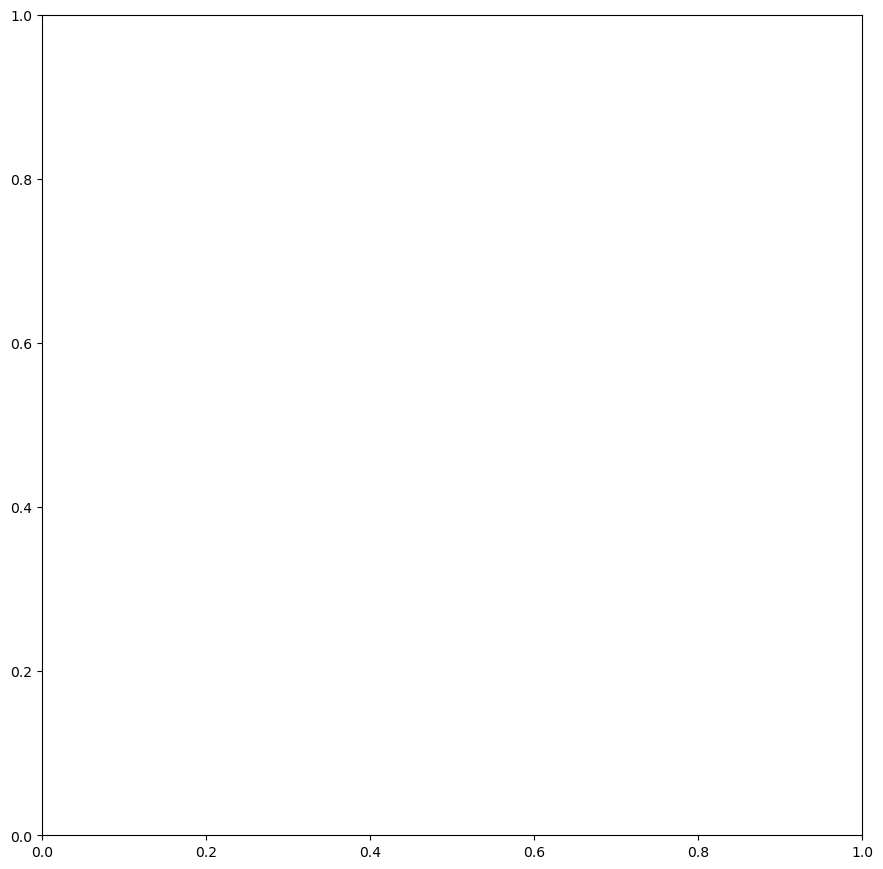

In [24]:
fig = ph.utils.plot_loaded_fields(delta, potential, truth)

# Panoptic predictions (Semantic & Instance)

In [ ]:
semantic, instance = ph.predictions.panoptic_prediction(delta=delta, potential=potential)

# (Optional) Generate semantic and instance predictions separately

### Semantic predictions

In [ ]:
# semantic = ph.predictions.semantic_prediction(delta=delta, potential=potential)

### Instance predictions

In [ ]:
# instance = ph.predictions.instance_prediction(semantic, delta=delta, potential=potential)

# Evaluate semantic model results

### Visualize semantic metrics as a function of the semantic threshold

In [ ]:
list_semantic_thresholds, semantic_metrics = ph.utils.semantic_predictions_metrics_vs_thresholds(
    truth.flatten().astype(bool),
    semantic.flatten()
)

In [ ]:
fig, semantic_threshold = ph.utils.plot_semantic_metrics_vs_semantic_threshold(
    list_semantic_thresholds,
    semantic_metrics,
    true_collapsed_fraction = np.sum(truth.flatten().astype(bool)) / len(truth.flatten().astype(bool))
)

### Visualize semantic predictions (map level)

In [ ]:
fig = ph.utils.plot_semantic_map_predictions(
    truth, semantic, semantic_threshold
)

### Visualize evolution of TPR predicted by the semantic netwrok as a function of $\log_{10}M_{\mathrm{True}}\; [\mathrm{h}^{-1} M_\odot]$

In [ ]:
true_mass = ph.utils.compute_log10mass_map_from_label_map(truth)

In [ ]:
mass_bins, TPR_vs_true_mass = ph.utils.compute_TPR_vs_true_mass(true_mass, semantic, semantic_threshold)

In [ ]:
fig = ph.utils.plot_TPR_vs_true_mass(mass_bins, TPR_vs_true_mass)

# Evaluate instance model results

### Visualize instance predictions (mass map level)

In [ ]:
pred_mass = ph.utils.compute_log10mass_map_from_label_map(instance)

In [ ]:
fig = ph.utils.plot_instance_mass_map_predictions(true_mass, pred_mass)

### Visualize violin plot

In [ ]:
true_array = true_mass.flatten()
pred_array = pred_mass.flatten()

fig = ph.utils.violin_plot(true_array, pred_array, N_bins=16)

### Visualize HMF

In [ ]:
mp=6.350795014316703*1e8

M_halos_true = np.bincount(truth.flatten()) * mp
xx_true, yy_true = ph.utils.compute_HMF(M_halos_true, volume=50**3)

M_halos_pred = np.bincount(instance.flatten()) * mp
xx_pred, yy_pred = ph.utils.compute_HMF(M_halos_pred, volume=50**3)

fig = ph.utils.plot_HMF(xx_true, yy_true, xx_pred, yy_pred)